Referencias:

- https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/
- https://learnopencv.com/image-filtering-using-convolution-in-opencv/
- https://setosa.io/ev/image-kernels/


In [1]:
from numpy import asarray
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# En 1D

In [2]:
# define input data
data = asarray([0, 0, 0, 1, 1, 0, 0, 0])
data = data.reshape(1, 8, 1)

In [3]:
# create model
model = Sequential()
model.add(Conv1D(1, 3, input_shape=(8, 1)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 1)              4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [4]:
# define a vertical line detector
weights = [asarray([[[0]],[[1]],[[0]]]), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

In [5]:
# confirm they were stored
print(model.get_weights())

[array([[[0.]],

       [[1.]],

       [[0.]]], dtype=float32), array([0.], dtype=float32)]


In [6]:
# apply filter to input data
yhat = model.predict(data)
print(yhat)

[[[0.]
  [0.]
  [1.]
  [1.]
  [0.]
  [0.]]]


### ¿Cuáles eran la dimensión inicial de la entrada, el tamaño del kernel y la dimensión de la salida?

# En 2D

In [42]:
data = [[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0.5, 1, 1, 0, 0, 0],
        [0, 0, 0, 0.5, 1, 1, 0, 0, 0],
        [0, 0, 0, 0.5, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 9, 9, 1)
# np.shape(data)

In [43]:
# plt.matshow(data.reshape(8,8))

<AxesSubplot:>

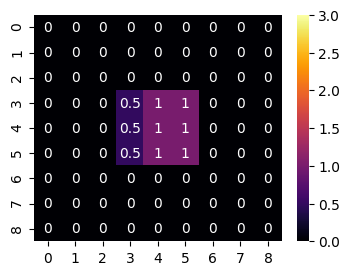

In [44]:
plt.figure(figsize=(4, 3), dpi=100)
sns.heatmap(data.reshape(9,9), 
        fmt='g', xticklabels=True, yticklabels=True, 
        cmap = 'inferno', cbar=True, annot=True,
        robust=False, vmin=0, vmax=3)

In [45]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

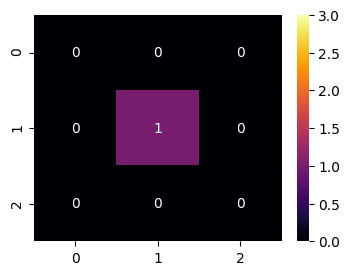

In [46]:
detector = [[[[0]],[[0]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[0]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# confirm they were stored
# print(model.get_weights())
plt.figure(figsize=(4, 3), dpi=100)
sns.heatmap(np.array(detector).reshape(3,3), 
        fmt='g', xticklabels=True, yticklabels=True, 
        annot=True,
        cmap = 'inferno', cbar=True,
        robust=False, vmin=0, vmax=3)

In [47]:
# apply filter to input data
yhat = model.predict(data)
for r in range(yhat.shape[1]):
    # print each column in the row
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.5, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.5, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.5, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [48]:
# plt.matshow(yhat.reshape(6,6))

<AxesSubplot:>

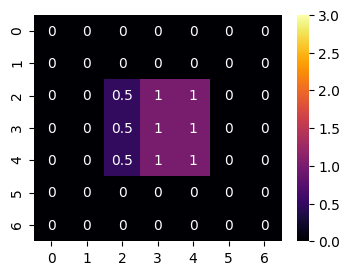

In [52]:
# plt.matshow(yhat.reshape(6,6))
plt.figure(figsize=(4, 3), dpi=100)
sns.heatmap(yhat.reshape(7,7), 
        fmt='g', xticklabels=True, yticklabels=True, 
        annot=True,
        cmap = 'inferno', cbar=True,
        robust=False, vmin=0, vmax=3)

### Describir dimensiones de imagen de entrada, kernel e imagen de salida

# Jugando con "multiplicaciones" de tensores

<AxesSubplot:>

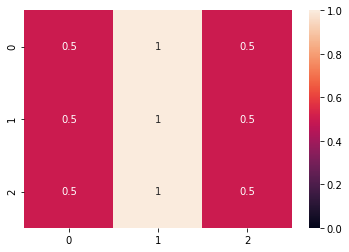

In [43]:
from numpy import tensordot

m1 = asarray([[0.5, 1, 0.5],
              [0.5, 1, 0.5],
              [0.5, 1, 0.5]])

sns.heatmap(m1, fmt='g', xticklabels=True, yticklabels=True, 
            annot=True, cbar=True,
            robust=False, vmin=0, vmax=1)

<AxesSubplot:>

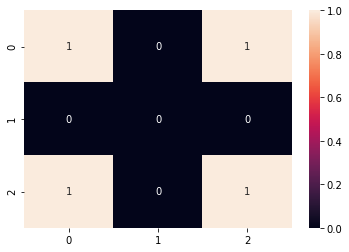

In [47]:
# m2 = asarray([[0, 0, 0],
#               [0, 0, 0],
#               [0, 0, 0]])
# m2 = asarray([[0, 1, 0],
#               [0, 1, 0],
#               [0, 1, 0]])
# m2 = asarray([[0, 1, 1],
#               [0, 1, 1],
#               [0, 1, 1]])
m2 = asarray([[1, 0, 1],
              [0, 0, 0],
              [1, 0, 1]])
sns.heatmap(m2, fmt='g', xticklabels=True, yticklabels=True, 
            annot=True, cbar=True,
            robust=False, vmin=0, vmax=1)

<AxesSubplot:>

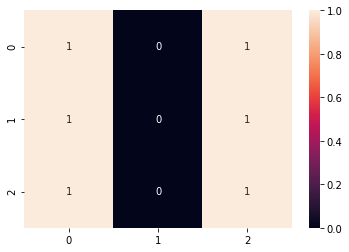

In [48]:
m3 = tensordot(m1, m2, axes=(1))
sns.heatmap(m3, fmt='g', xticklabels=True, yticklabels=True, 
            annot=True, cbar=True,
            robust=False, vmin=0, vmax=1)

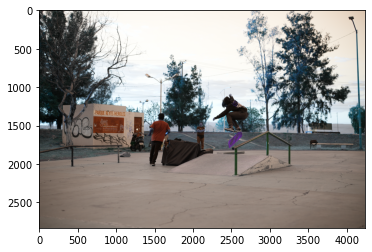

In [12]:
image = cv2.imread('../data/test.jpg')
plt.imshow(image/255)

<AxesSubplot:>

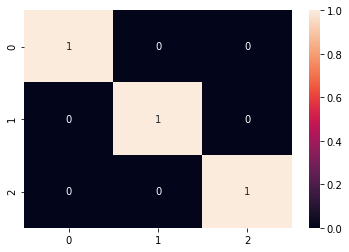

In [24]:
# Apply identity kernel
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
# Apply blurring kernel
kernel2 = np.ones((5, 5), np.float32) / 25
# other kernel
kernel3 = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1]])

kernel = kernel3

sns.heatmap(kernel, fmt='g', xticklabels=True, yticklabels=True, 
            annot=True, cbar=True,
            robust=False)

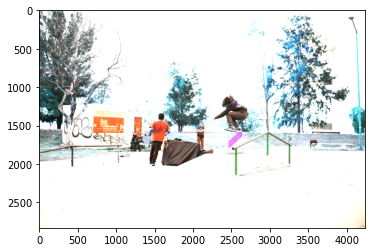

In [25]:
output = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
plt.imshow(output)